In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import re
import os
import operator
import collections

In [2]:
# npl related
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [3]:
from classifiers import *

C:\Users\desai\anaconda3\python.exe
['C:\\Users\\desai\\Documents\\ML_stuff\\000_gitrepos\\coursera\\fakenews_clf', 'C:\\Users\\desai\\anaconda3\\python38.zip', 'C:\\Users\\desai\\anaconda3\\DLLs', 'C:\\Users\\desai\\anaconda3\\lib', 'C:\\Users\\desai\\anaconda3', '', 'C:\\Users\\desai\\anaconda3\\lib\\site-packages', 'C:\\Users\\desai\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\desai\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\desai\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\desai\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\desai\\.ipython']

Finished.................


# Inputs

In [4]:
# Numbers of observation to be selected from dataframe
num_examples = 100
# Get test and train dataframes
path_img = '../img/'
path_data =  '../data/'

# Pre train and test data

In [5]:
news = pd.read_csv('data/news.csv')

In [6]:
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
news.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
news.shape

(6335, 3)

# Cleaning Text

In [9]:
>>> import nltk
>>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\desai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
news['txt_total'] = news['title'] + ' ' + news['text']

In [11]:
# cleaning reviews
news['txt_total_c'] = news['txt_total'].apply(get_cleaned_text, words_len=1,
                                          remove_stopwords=True, is_stemming=True,
                                          is_lemma=False, split=False)

In [12]:
news['label'] = news['label'].map({'FAKE': 0, 'REAL': 1})

In [13]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        6335 non-null   object
 1   text         6335 non-null   object
 2   label        6335 non-null   int64 
 3   txt_total    6335 non-null   object
 4   txt_total_c  6335 non-null   object
dtypes: int64(1), object(4)
memory usage: 247.6+ KB


# Story length

In [14]:
news['text_len'] = news['txt_total_c'].str.len()
# news['title_len'] = news['title_c'].str.len()

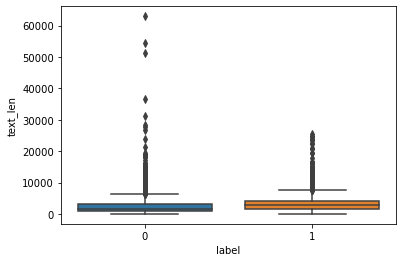

In [15]:
# fig, ax1 = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x= "label" , y= "text_len", data=news)
# sns.boxplot(x= "label" , y= "title_len", data=news, ax=ax2)

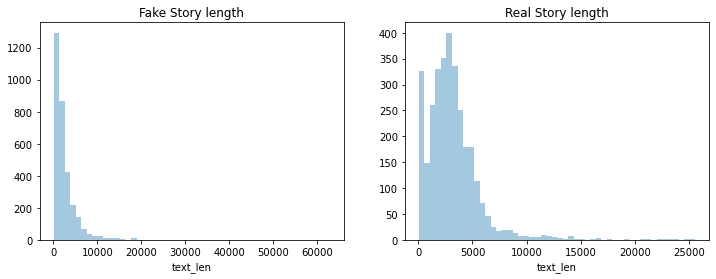

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.distplot(news[news.label==0]['text_len'], ax=ax1, kde=False)
ax1.set(title='Fake Story length');

sns.distplot(news[news.label==1]['text_len'], ax=ax2, kde=False)
ax2.set(title='Real Story length');


# sns.distplot(news[news.label==0]['title_len'], ax=ax2, kde=False)
# ax1.set(title='Fake news title length');

# sns.distplot(news[news.label==1]['title_len'], ax=ax2, kde=False)
# ax2.set(title='Real news title length');


# Vectorizing Text

In [17]:
# corpus = []
# ps = PorterStemmer()
# for i in range(sms.shape[0]):
#     msg = re.sub('^[a-zA-Z]', ' ', sms['message'][i])
#     msg = msg.lower()
#     msg = msg.split()
    
#     msg = [ps.stem(word) for word in msg if not word in stopwords.words('english')]
    
#     msg = " ".join(msg)
#     corpus.append(msg)

In [18]:
news.head()

,title,text,label,txt_total,txt_total_c,text_len
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear Daniel Greenfield...,smell hillari fear daniel greenfield shillman ...,4287
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...,watch exact moment paul ryan commit polit suic...,1596
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy U....,kerri go pari gestur sympathi u secretari stat...,1559
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...,berni support twitter erupt anger dnc tri warn...,1674
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...,battl new york primari matter primari day new ...,1088


In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

In [20]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(news['txt_total_c'])
freq_term_matrix = count_vectorizer.transform(news['txt_total_c'])

tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

# print(tf_idf_matrix)

In [32]:
print ('step:2 vectorizing text')
# cv = CountVectorizer(max_features=500, ngram_range=(1,1))
cv = TfidfVectorizer(max_features=2000, ngram_range=(1,1), min_df=0.1, max_df=0.9)
X = cv.fit_transform(news['txt_total_c']).toarray()
y = news['label']

step:2 vectorizing text


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

train_cv = pd.DataFrame(X_train, columns=cv.get_feature_names())
test_cv = pd.DataFrame(X_test, columns=cv.get_feature_names())
print ('\nstep 2 completed')


step 2 completed


# Word Cloud

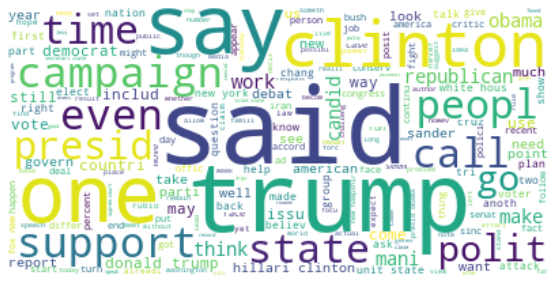

In [34]:
str1 = news[news.label==1].txt_total_c.values.tolist()
str1 = " ".join(str1)
wc = WordCloud(background_color='white').generate(str1)
plt.figure(figsize=(16,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

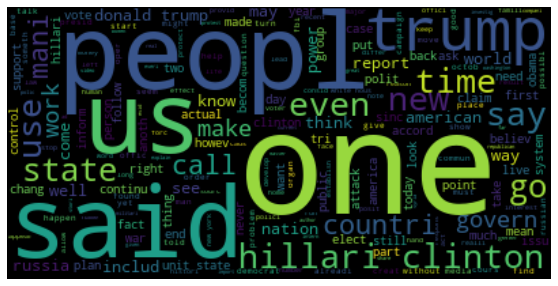

In [35]:
str2 = news[news.label==0].txt_total_c.values.tolist()
str2 = " ".join(str2)
wc = WordCloud(background_color='black').generate(str2)
plt.figure(figsize=(16,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Ploting cout of the classes

step: 5 plotting label counts
step 5 completed......



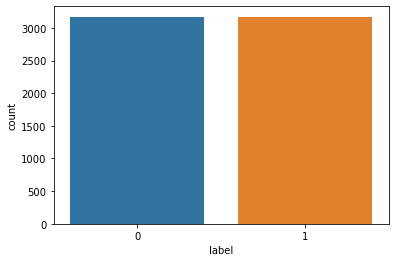

In [36]:
print ('step: 5 plotting label counts')
sns.countplot(x='label', data=news)
print ('step 5 completed......\n')

# feature importance

In [37]:
print ('step: 6 plotting feature importance')

max_words = 5000

words = cv.get_feature_names()
word_frequency = X.sum(axis=0)

feature_imp = dict(zip(words, word_frequency))
sorted_features = sorted(feature_imp.items(),
                                key=operator.itemgetter(1), reverse=True)
df_imp = pd.DataFrame(sorted_features, columns=['word', 'frequency'])

step: 6 plotting feature importance


step 6 completed......



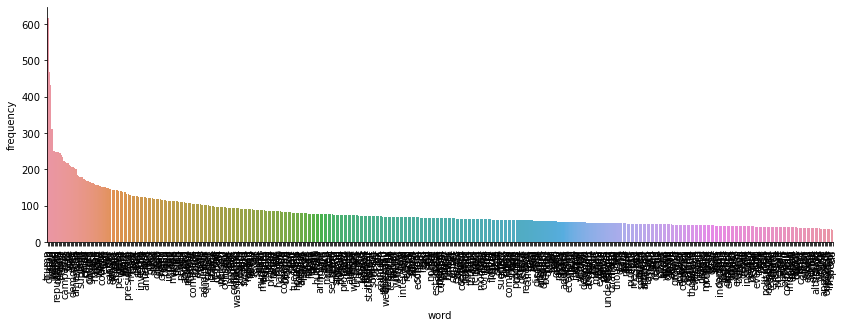

In [38]:
sns_plot = sns.catplot(x='word' , y='frequency', kind='bar', data=df_imp[0:max_words], height=4, aspect=3)
sns_plot.set_xticklabels(rotation=90)
print ('step 6 completed......\n')

In [39]:
df_r, cm = clf_model(X_train, y_train, X_test, y_test, model=None, path4plot=None)

	 1. --> model_knn
	 2. --> model_gb
	 3. --> model_mnb
	 4. --> model_dt
	 5. --> model_rf
	 6. --> model_edt
	 7. --> model_svc
	 8. --> model_lr
	 9. --> model_xgb
	 10. --> model_abc
	 11. --> model_nusvc
	 12. --> model_linsvc
	 13. --> model_sgd
	 14. --> model_gpc
	 15. --> model_gbc
	 16. --> model_mlp


In [40]:
df_r = df_r.sort_values(by='test_acc', ascending=False)

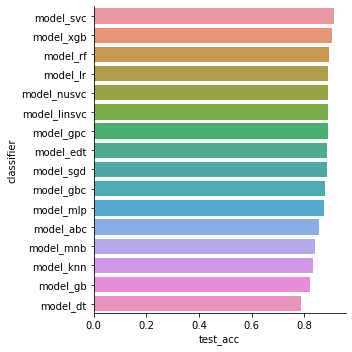

In [41]:
sns.catplot(x='test_acc', y='classifier', kind='bar', data=df_r)

In [43]:
df_r

,classifier,train_acc,test_acc,f1_wighted,f1_macro,f1_macro
6,model_svc,0.986919,0.911625,0.911611,0.911625,0.911615
8,model_xgb,0.999323,0.907417,0.907415,0.907417,0.907416
4,model_rf,1.000000,0.893740,0.893713,0.893740,0.893719
7,model_lr,0.909111,0.890058,0.890047,0.890058,0.890050
10,model_nusvc,0.940009,0.889532,0.889427,0.889532,0.889439
11,model_linsvc,0.934822,0.889006,0.888992,0.889006,0.888996
13,model_gpc,0.915201,0.888480,0.888429,0.888480,0.888437
5,model_edt,1.000000,0.887428,0.887423,0.887428,0.887425
12,model_sgd,0.932567,0.886376,0.886314,0.886376,0.886323
14,model_gbc,0.936401,0.880063,0.880014,0.880063,0.880022


# Hyperparameter tuning

In [44]:
clf = SVC()

In [45]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [46]:
rcv = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv=3, scoring='accuracy', verbose=2)

rcv.fit(X_train, y_train)

rcv.best_estimator_

In [49]:
clf = SVC(C=10, gamma=1)

In [50]:
clf.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [51]:
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)

train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)

f1_macro = f1_score(y_test, y_pred, average='macro')

f1_micro = f1_score(y_test, y_pred, average='micro')

f1_weighted = f1_score(y_test, y_pred, average='weighted')

print ('Test accuracy: ', test_acc)
print ('Train accuracy: ', train_acc)
print ('Test f1_micro: ', f1_micro)
print ('Test f1_macro: ', f1_macro)
print ('Test f1_weighted: ', f1_weighted)

Test accuracy:  0.9147816938453446
Train accuracy:  1.0
Test f1_micro:  0.9147816938453446
Test f1_macro:  0.9147777084108177
Test f1_weighted:  0.9147755624076109


In [52]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       947
           1       0.92      0.90      0.91       954

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901



In [53]:
cm = confusion_matrix(y_test, y_pred)

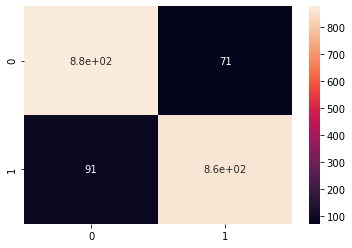

In [54]:
sns.heatmap(cm, annot=True)

In [85]:
param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [78]:
clf = XGBClassifier()

rcv = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv=3, scoring='accuracy', verbose=0)

rcv.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [79]:
rcv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
clf = XGBClassifier(learning_rate=0.2, max_depth=8, min_child_weight=5, gamma=0.4, colsample_bytree=0.3)

In [82]:
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [83]:
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)

train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)

f1_macro = f1_score(y_test, y_pred, average='macro')

f1_micro = f1_score(y_test, y_pred, average='micro')

f1_weighted = f1_score(y_test, y_pred, average='weighted')

print ('Test accuracy: ', test_acc)
print ('Train accuracy: ', train_acc)
print ('Test f1_micro: ', f1_micro)
print ('Test f1_macro: ', f1_macro)
print ('Test f1_weighted: ', f1_weighted)

Test accuracy:  0.9032088374539716
Train accuracy:  0.995489400090212
Test f1_micro:  0.9032088374539716
Test f1_macro:  0.9032066679211449
Test f1_weighted:  0.9032049805067242


In [ ]:
clf = XGBClassifier()

rcv = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=0)

rcv.fit(X_train, y_train)

In [ ]:
rcv.best_estimator_